# Day 08. Exercise 04
# Regression

## 0. Imports

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [105]:
df = pd.read_csv('../data/checker_regression.csv')
df = df.fillna(0)
df = df.drop_duplicates()
df = df.drop('uid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0 bytes


In [106]:
X = df.drop(columns=['AVG(diff)'])
y = df['AVG(diff)']


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [108]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_scores = []
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_train_pred = model.predict(X_train_cv)
        y_test_pred = model.predict(X_test_cv)

        train_rmse = sqrt(mean_squared_error(y_train_cv, y_train_pred))
        test_rmse = sqrt(mean_squared_error(y_test_cv, y_test_pred))
        print(f"train -  {train_rmse}   |   test -  {test_rmse}")
        test_scores.append(test_rmse)

    avg_rmse = np.mean(test_scores)
    print(f"Average RMSE on crossval is {avg_rmse}")
    return avg_rmse

In [109]:
crossval(10, X, y, LinearRegression())

train -  61.35327112662008   |   test -  57.85614740884658
train -  62.5462335194863   |   test -  44.71218893425673
train -  61.14556371253599   |   test -  83.19897138394585
train -  58.416728626194235   |   test -  79.399015977114
train -  60.11026827841826   |   test -  68.75614618929599
train -  60.619323028395335   |   test -  65.92296908962915
train -  61.72075104991357   |   test -  61.8003605530157
train -  62.60680682836641   |   test -  46.68994292992783
train -  55.58034321272078   |   test -  99.08124434288634
train -  61.57793245106181   |   test -  53.24118830442656
Average RMSE on crossval is 66.06581751133447


np.float64(66.06581751133447)

In [110]:
crossval(10, X, y, DecisionTreeRegressor(random_state=21))

train -  0.0   |   test -  117.17718934888181
train -  0.0   |   test -  79.5333147061541
train -  0.0   |   test -  0.0
train -  0.0   |   test -  78.98656472722058
train -  0.0   |   test -  101.36705213854874
train -  0.0   |   test -  35.38836908740875
train -  0.0   |   test -  0.0
train -  0.0   |   test -  69.81014730443323
train -  0.0   |   test -  117.52949078296776
train -  0.0   |   test -  40.58792924010783
Average RMSE on crossval is 64.03800573357229


np.float64(64.03800573357229)

In [ ]:
crossval(10, X, y, (RandomForestRegressorrandom_state=21))

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (46576920.py, line 1)

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([-65.37155876, -64.35835788, -39.1017355 , -64.69609151,
       -19.73759138, -65.03382514])

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=21)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt


array([-223.6,  -48.5,    0. , -175.6,    0. , -175.6])

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=21)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([-1.86402667e+02, -6.54900000e+01, -1.75000000e-01, -1.38915000e+02,
        0.00000000e+00, -1.66714333e+02])

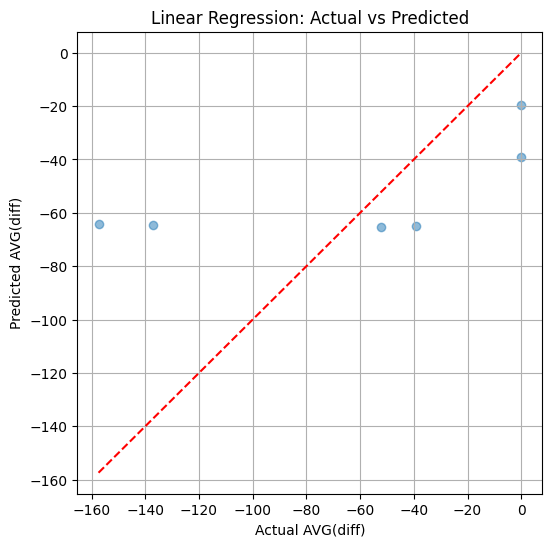

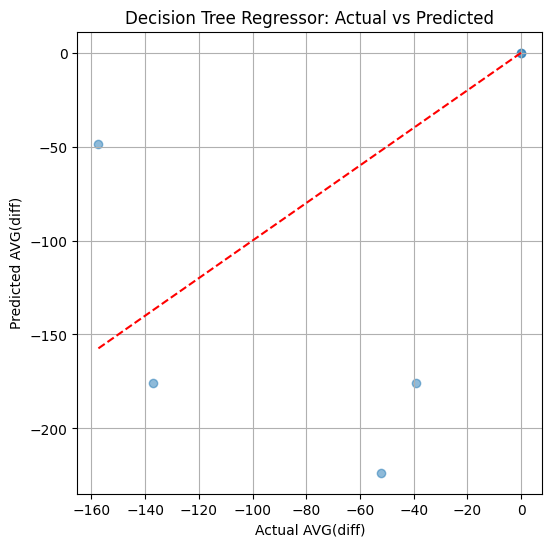

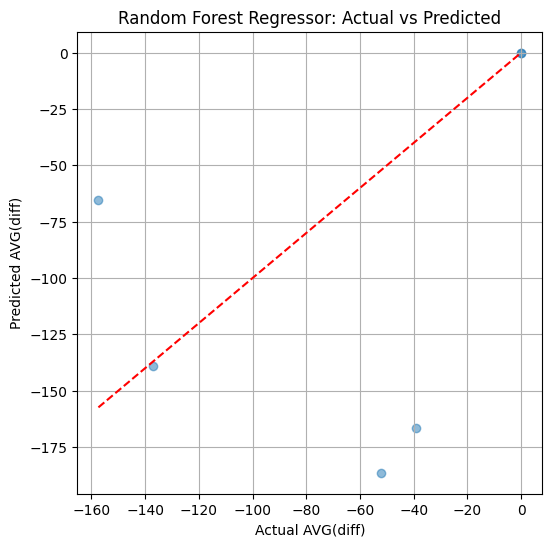

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual AVG(diff)')
    plt.ylabel('Predicted AVG(diff)')
    plt.title(title)
    plt.grid(True)
    plt.show()
    
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")
plot_actual_vs_predicted(y_test, y_pred_dt, "Decision Tree Regressor: Actual vs Predicted")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest Regressor: Actual vs Predicted")

How would plot look like in the ideal case? Like line diagonal